In [13]:
import pandas as pd

# Load the data
ratings = pd.read_csv(r"C:\Users\udhay\OneDrive\Documents\Project_PRS\ml-100k\u.data", 
                      sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Preview
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [16]:
movie_titles = pd.read_csv(r"C:\Users\udhay\OneDrive\Documents\Project_PRS\ml-100k\u.item", sep='|', encoding='latin-1', header=None)
movie_titles = movie_titles[[0, 1]]
movie_titles.columns = ['item_id', 'title']

# Merge with ratings
data = pd.merge(ratings, movie_titles, on='item_id')

# Preview the final dataset
data.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [9]:
# Average rating per movie
avg_ratings = data.groupby('title')['rating'].mean()

# Number of ratings per movie
num_ratings = data.groupby('title')['rating'].count()

# Combine into a new DataFrame
ratings_summary = pd.DataFrame({
    'average_rating': avg_ratings,
    'num_ratings': num_ratings
})

# Sort and show popular movies
ratings_summary.sort_values(by='num_ratings', ascending=False).head(10)

,average_rating,num_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


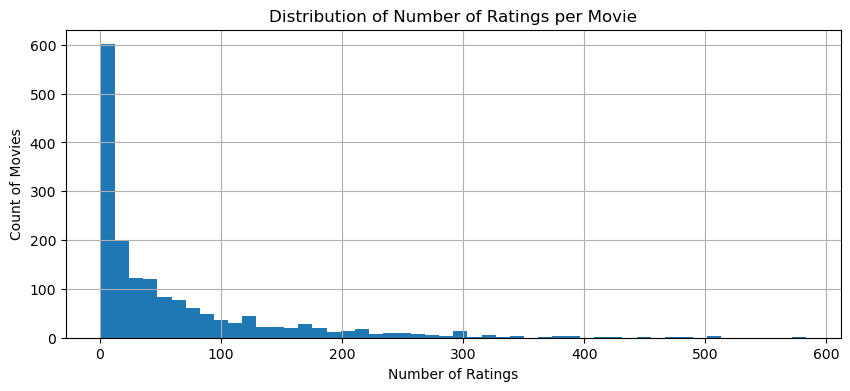

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
ratings_summary['num_ratings'].hist(bins=50)
plt.title("Distribution of Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Movies")
plt.show()

In [15]:
ratings.info()
ratings.describe()
ratings.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


user_id        943
item_id       1682
rating           5
timestamp    49282
dtype: int64

In [17]:
user_movie_matrix = data.pivot_table(index='user_id', columns='title', values='rating')
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [33]:
# 1. Select movie ratings
toy_story_ratings = user_movie_matrix['Toy Story (1995)']

# 2. Correlate with other movies
similar_movies = user_movie_matrix.corrwith(toy_story_ratings)

# 3. Convert to DataFrame and clean it
corr_df = pd.DataFrame(similar_movies, columns=['correlation'])
corr_df.dropna(inplace=True)

# 4. Preview
corr_df.head()

C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


In [35]:
# Join with your ratings summary (you made this earlier, remember?)
corr_df = corr_df.join(ratings_summary['num_ratings'])

# Only keep movies with 100+ ratings
recommendations = corr_df[corr_df['num_ratings'] > 100].sort_values('correlation', ascending=False)

# Show top 10 similar movies
recommendations.head(10)

,correlation,num_ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


In [37]:
def get_similar_movies(movie_name, min_ratings=100):
    # Make sure the movie exists
    if movie_name not in user_movie_matrix.columns:
        return f"Movie '{movie_name}' not found in dataset."

    # Get ratings for the input movie
    target_movie_ratings = user_movie_matrix[movie_name]

    # Compute correlations
    similar_scores = user_movie_matrix.corrwith(target_movie_ratings)

    # Create DataFrame
    corr_df = pd.DataFrame(similar_scores, columns=['correlation'])
    corr_df.dropna(inplace=True)

    # Add number of ratings
    corr_df = corr_df.join(ratings_summary['num_ratings'])

    # Filter by minimum ratings and sort
    recommendations = corr_df[corr_df['num_ratings'] > min_ratings].sort_values('correlation', ascending=False)

    # Exclude the movie itself
    return recommendations[recommendations.index != movie_name].head(10)


In [39]:
get_similar_movies('Toy Story (1995)')

C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,correlation,num_ratings
title,,
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129
That Thing You Do! (1996),0.427936,176


In [41]:
get_similar_movies('Star Wars (1977)')

C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\udhay\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,correlation,num_ratings
title,,
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
L.A. Confidential (1997),0.319065,297
